In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Interpolation

## Question 1

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(a)** [10] Analytically find the interpolating polynomial $P(x)$ in the basis
1. Monomial: $P(x) = p_0 + p_1 x + p_2 x^2$
1. Lagrange: $P(x) = \sum^2_{k=0} y_k \ell_k(x)$
1. Newton: $P(x) = \sum^2_{i=0} a_i n_i(x)$

You can use the values given above.

Solution: For monomial basis, we use system of equations based on three points.
$$\mathcal{P}_2(x_0) = p_0 + p_1 x_0 + p_2 x_0^2 = y_0$$

$$\mathcal{P}_2(x_1) = p_0 + p_1 x_1 + p_2 x_1^2 = y_1$$

$$\mathcal{P}_2(x_2) = p_0 + p_1 x_2 + p_2 x_2^2 = y_2$$

Then we have 
$$y_1 - y_0 = p_1(x_1 - x_0) + p_2(x_1^2 - x_0^2)$$
to get 
$$\frac{y_1 - y_0}{x_1 - x_0} = p_1 + p_2(x_1 + x_0)$$
Change the index, we have 
$$\frac{y_2 - y_1}{x_2 - x_1} = p_1 + p_2(x_2 + x_1)$$
Therefore, 
$$p_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}$$
Then go back and get $p_1$, 
$$p_1 = \frac{y_1 - y_0}{x_1 - x_0} - p_2(x_0 + x_1)$$
That is
$$p_1= \frac{y_1 - y_0}{x_1 - x_0} - \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1)$$
Similarly, using $~~p_0 + p_1 x_0 + p_2 x_0^2 = y_0,$
$$p_0 = y_0 - \frac{y_1 - y_0}{x_1 - x_0} - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1))x_0 - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0})x_0^2
$$
Therefore under monomial basis we have

$$\mathcal{P}(x) = y_0 - \frac{y_1 - y_0}{x_1 - x_0} - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1))x_0 - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0})x_0^2 + ( \frac{y_1 - y_0}{x_1 - x_0} - \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1))\cdot x + ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0})\cdot x^2
$$


Second, we solve for Lagrange basis in this context:
$$\ell_0(x) = \frac{x - x_1}{x_0 - x_1} \frac{x - x_2}{x_0 - x_2}$$

$$\ell_1(x) = \frac{x - x_0}{x_1 - x_0} \frac{x - x_2}{x_1 - x_2}$$

$$\ell_2(x) = \frac{x - x_0}{x_2 - x_0} \frac{x - x_1}{x_2 - x_1}$$
So that Lagrange polynomial
$$\mathcal{P}(x) = \frac{x - x_1}{x_0 - x_1} \frac{x - x_2}{x_0 - x_2} \cdot y_0 + \frac{x - x_0}{x_1 - x_0} \frac{x - x_2}{x_1 - x_2} \cdot y_1 + \frac{x - x_0}{x_2 - x_0} \frac{x - x_1}{x_2 - x_1} \cdot y_2$$


Thirdly, for Newton basis$~~\mathcal{P}(x) = \sum^2_{i=0} a_i n_i(x):$
$$n_0 = 1, ~~~~ n_1 = x - x_0, ~~~~ n_2 = (x - x_0)(x - x_1)$$
with
$$a_0 = y_0, ~~~~ a_1 = \frac{y_1 - y_0}{x_1 - x_0}, ~~~~ a_2 = \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)}$$
Then we get the Newton polynomial 
$$\mathcal{P}(x) = y_0 + \frac{y_1 - y_0}{x_1 - x_0} \cdot (x - x_0) + (\frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)}) \cdot (x - x_0)(x - x_1)$$

**(b)** [10] Show that these all lead to the same polynomial (show that $P(x)$ is in fact unique).

Solution: Basically, if we prove that in different forms of polynomial, the coefficients before basis 1, x and x$^2$ are the same, then the statement holds.

Now we have, in the case of monomial basis, coeffcients are: 
$$For ~~1 = x^0, ~~~~~~~~p_0 = y_0 - \frac{y_1 - y_0}{x_1 - x_0} - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1))x_0 - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0})x_0^2
$$

$$For ~~x^1, ~~~~~~~~ p_1= \frac{y_1 - y_0}{x_1 - x_0} - \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1)
$$

$$For ~~ x^2, ~~~~~~~~ p_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}
$$

Then we can show that coefficients in Lagrange polynomial are, correspondingly, the same for 1, x$^1$, x$^2$.

Lagrange:
$$\mathcal{P}(x) = \frac{x - x_1}{x_0 - x_1} \frac{x - x_2}{x_0 - x_2} \cdot y_0 + \frac{x - x_0}{x_1 - x_0} \frac{x - x_2}{x_1 - x_2} \cdot y_1 + \frac{x - x_0}{x_2 - x_0} \frac{x - x_1}{x_2 - x_1} \cdot y_2$$
So for 1 = x$^0$,
$$ \frac{y_0x_1x_2}{(x_1 - x_0)(x_2 - x_0)} + \frac{y_1x_0x_2}{(x_0 - x_1)(x_2 - x_1)} + \frac{y_2x_0x_1}{(x_2 - x_0)(x_2 - x_1)} \\
= \frac{y_0(x_1x_2+x_1x_0-x_1x_0+x_0^2-x_0^2-x_0x_2+x_0x_2}{(x_1 - x_0)(x_2 - x_0)} + \frac{y_1x_0x_2}{(x_0 - x_1)(x_2 - x_1)} + \frac{y_2x_0x_1}{(x_2 - x_0)(x_2 - x_1)} \\
= \frac{y_0(x_1 - x_0)(x_2 - x_0)}{(x_1 - x_0)(x_2 - x_0)} - \frac{y_1-y_0}{x_1-x_0}x_0 +(\frac{y_2-y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1-y_0}{(x_1 - x_0)(x_2 - x_0)})x_1x_0 \\
= y_0 - \frac{y_1-y_0}{x_1-x_0}x_0 +(\frac{y_2-y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1-y_0}{(x_1 - x_0)(x_2 - x_0)})x_1x_0 \\
= y_0 - \frac{y_1-y_0}{x_1-x_0}x_0 - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0})x_0x_1 \\
= y_0 - \frac{y_1 - y_0}{x_1 - x_0} - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1))x_0 - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0})x_0^2 \\
= p_0
$$
Then for x$^1$,
$$ - \frac{y_0(x_1+x_2)}{(x_0-x_1)(x_0-x_2)} - \frac{y_1(x_0+x_2)}{(x_0-x_1)(x_2-x_1)} - \frac{y_2(x_1+x_0)}{(x_2-x_0)(x_2-x_1)} \\
= - \frac{y_0(x_1+x_0)+y_0(x_2-x_0)}{(x_1-x_0)(x_2-x_0)} + \frac{y_1(x_1+x_0)+y_1(x_2-x_1)}{(x_1-x_0)(x_2-x_1)} - \frac{y_2(x_1+x_0)}{(x_2-x_0)(x_2-x_1)} \\
= \frac{y_1-y_0}{x_1-x_0} - \frac{y_2-y_1}{(x_2-x_1)(x_2-x_0)}(x_1+x_0) + \frac{y_1-y_0}{(x_1-x_0)(x_2-x_0)}(x_1+x_0) \\
= \frac{y_1-y_0}{x_1-x_0} - (\frac{y_2-y_1}{(x_2-x_1)(x_2-x_0)} - \frac{y_1-y_0}{(x_1-x_0)(x_2-x_0)})(x_1+x_0) \\
= \frac{y_1-y_0}{x_1-x_0} - \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1) \\
= p_1
$$
Last, for x$^2$,
$$\frac{y_0}{(x_1-x_0)(x_2-x_0)} + \frac{y_1}{(x_1-x_0)(x_1-x_2)} + \frac{y_2}{(x_2-x_0)(x_2-x_1)} \\
= \frac{(y_2-y_1)(x_1-x_0)}{(x_1-x_0)(x_2-x_0)(x_2-x_1)} + \frac{(y_1-y_0)(x_1-x_2)}{(x_1-x_0)(x_2-x_0)(x_2-x_1)} \\
= \frac{y_2-y_1}{(x_1-x_0)(x_2-x_0)(x_2-x_1)} - \frac{y_1-y_0}{(x_1-x_0)(x_2-x_0)(x_2-x_1)} \\
= \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} \\
= p_2
$$
Therefore, Lagrange polynomial has the same coefficients as the case under monomial basis, which means that lagarange basis and monomial basis are of the same polynomial.

Then, we use the same method to prove for Newton basis:
$$\mathcal{P}(x) = y_0 + \frac{y_1 - y_0}{x_1 - x_0} \cdot (x - x_0) + (\frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)}) \cdot (x - x_0)(x - x_1)$$
For 1=x$^0$, 
$$ y_0 - \frac{y_1-y_0}{x_1-x_0}x_0 +  (\frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)})(x_1x_0) \\ 
= y_0 - \frac{y_1-y_0}{x_1-x_0}x_0 - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0})(x_0x_1) \\
= y_0 - \frac{y_1 - y_0}{x_1 - x_0} - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}(x_0 + x_1))x_0 - ( \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0})x_0^2 \\
= p_0
$$
For x$^1$,
$$ \frac{y_1-y_0}{x_1-x_0} - (\frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)})(x_1+x_0) \\
= \frac{y_1-y_0}{x_1-x_0} - (\frac{y_2-y_1}{(x_2-x_1)(x_2-x_0)} - \frac{y_1-y_0}{(x_1-x_0)(x_2-x_0)})(x_1+x_0) \\
= p_1
$$
For x$^2$,
$$ \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} \\
= \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} \\
= p_2
$$
This finishes the proof for the coefficients of Newton basis and monomial basis of the second order polynomial.

In the end, since all three types of basis can be deduced into same polynomial, we know that $\mathcal{P}(x)$ is unique.

**(c)** [10] Use the uniqueness of the interpolating polynomial to show that for general $N+1$ points

$$\sum^N_{i=0} \ell_i(x) = 1$$

at any value of $x$ (i.e. the interpolant of a constant is a constant regardless of $N$).

Hint:  Consider the Newton polynomial form and uniqueness.

Solution: We select constant function $f(x) = 1$ for the Lagrange interpolation, such that
$$ 1 = f(x) = P(x) + R_n(x) =  \sum^N_{i=0} 1 \cdot \ell_i(x) + \frac{1}{(n+1)!}f^{(n+1)}(\xi)w_{n+1}(x) $$
Since $~~f^{(n+1)}(\xi) = 0$,
We have 
$$\sum^N_{i=0} \ell_i(x) = 1$$

## Question 2

[20] The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$w(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} a & ~ & m = n \\ 0 & ~ & m \neq n \end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).

Solution: Our goal is to prove that the Chebyshev polynomials are orthogonal, that is 
$$ \int^1_{-1} w(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} a & ~ & m = n \\ 0 & ~ & m \neq n \end{aligned} \right .$$

So, set x = $\cos \theta$, then deduce that $dx = - \sin \theta d\theta$.

Then we have the equation above equals
$$ \int^{\pi}_0 \frac{1}{\sqrt{1- \cos^2 \theta}}T_m(\cos \theta)T_n(\cos \theta) \sin \theta d\theta \\
= \int^{\pi}_0 \frac{1}{\sqrt{1- \cos^2 \theta}}\cos (m\theta)\cos (n\theta) \sin \theta d\theta \\
= \int^{\pi}_0 \cos (m\theta)\cos (n\theta) d\theta \\
= \left \{ \begin{aligned} \pi & ~ & m = n = 0 \\ \frac{\pi}{2} & ~ & m = n \neq 0 \\ 0 & ~ & m \neq n \end{aligned} \right .$$
In the case of $m = n = 0$, the integration is simply over constant one.

In the case of $m = n \neq 0$, 
$$\int^{\pi}_0 \cos (m\theta)\cos (n\theta) d\theta = \int^{\pi}_0 \frac{1}{2} (\cos (2m \theta) +1) d\theta = \frac{\pi}{2} 
$$

In the case of $m \neq n$, the integration equals 
$$\frac{1}{m+n} \sin(m+n)\theta + \frac{1}{m-n} \sin(m-n)\theta  ~~\big{|}_0^{\pi} = 0
$$

Therefore, when $m \neq n$, the Chebyshev polynomials are orthogonal.

## Question 3

Consider the Lebesgue function
$$
\lambda_N(x)  = \sum_{i=0}^N\big{|}\ell_i(x)\big{|}
$$
where $\ell_i(x)$ are Lagrange basis functions for a given set of $x_i$.  The maximum of the Lebesgue function is called $\Lambda_n$ the Lebesgue constant and have a clear connection to Lagrangian interpolation as they provide a first estimate for the interpolation error.  Unfortunately, $\Lambda_N$ is not uniformly bounded regardless of the nodes used as one can show that 
$$
    \Lambda_N > \mathcal{O}(\log N) ~~~\text{as}~~~ N \rightarrow \infty
$$

Note, $\Lambda_n$ is the infinite-norm of the linear operator mapping data to interpolant on the given grid and interval.

**(a)** [10] What do you expect the Lebesgue function to look like?  Are there key points where we will know the function value exactly?

Solution: The plot of the Lebesgue function will be similar to wave-like  with lower bound one. 

Based on the definition, we can clearly see that for special points $x = x_i$, i = 0, 1, ..., N,
$$\lambda_N(x)  = \sum_{i=0}^N\big{|}\ell_i(x_i)\big{|} \\
= \big{|}\ell_0(x_i)\big{|} + \big{|}\ell_1(x_i)\big{|} + \cdots + \big{|}\ell_N(x_i)\big{|} \\
= 0 + 0 + \cdots + 1 + 0 + \cdots + 0 = 1
$$
Therefore, in general cases $\lambda_N(x)$ will be no less than one.

**(b)** [10] Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = -1 + \frac{2 i}{N}, ~~~ i = 0, 1, \ldots, N.
$$
For the case where $N = 20$ comment on what you see (you may need to use `semilogy` to see the results).

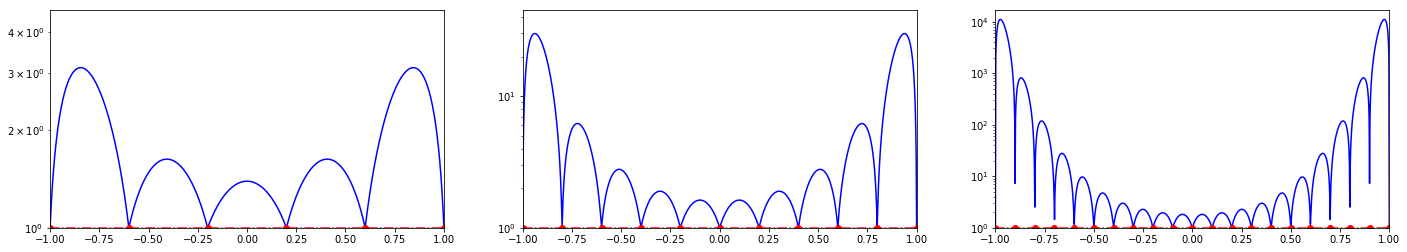

In [7]:
def lebesguefunction(x, data):
    leb = numpy.zeros(x.shape[0])
    for i in range(data.shape[0]):
        basis = numpy.ones(x.shape[0])
        for j in range(data.shape[0]):
            if i != j:
                basis *= (x - data[j]) / (data[i] - data[j])
        leb += numpy.abs(basis)
    
    return leb

# plot
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 4)
x = numpy.linspace(-1, 1, 1000)
for (i, N) in enumerate([5, 10, 20]):
    data = -1.0 + 2.0 * numpy.arange(N+1) / N
    y = lebesguefunction(x, data)
    axes = fig.add_subplot(1,3,i+1)
    axes.semilogy(x, y, 'b')
    axes.semilogy(data, numpy.ones(N+1), 'ro-.')
    axes.set_xlim((-1.0, 1.0))
    axes.set_ylim((1, 1.5 * numpy.max(y)))
    
plt.show()

Solution: Contrary to our asspumtion before, from the third graph we see that $\lambda_N(x)  \neq 1$ at some points $x_i$ near the left and right limits. 

It is becasue of the floating point error numerically.

**(c)** [10] Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = \cos\left( \frac{(2i - 1) \pi}{2 N} \right ) ~~~ i = 1, \ldots, N.
$$
Again comment on what you see in the case $N = 20$.

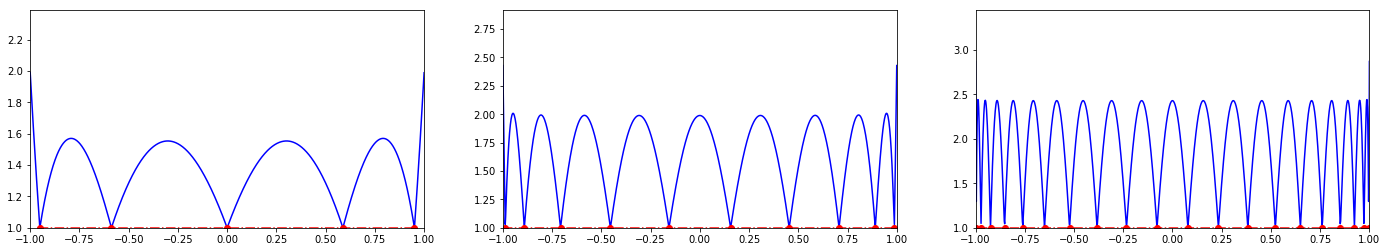

In [10]:
def lebesguefunction1(x, data):
    leb = numpy.zeros(x.shape[0])
    for i in range(data.shape[0]):
        basis = numpy.ones(x.shape[0])
        for j in range(data.shape[0]):
            if i != j:
                basis *= (x - data[j]) / (data[i] - data[j])
        leb += numpy.abs(basis)
    
    return leb

# plot
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 4)
x = numpy.linspace(-1, 1, 1000)
for (i, N) in enumerate([5, 10, 20]):
    data = numpy.cos((2.0 * numpy.arange(1, N+1) - 1.0) / (2.0 * N) * numpy.pi)
    y = lebesguefunction1(x, data)
    axes = fig.add_subplot(1,3,i+1)
    axes.plot(x, y, 'b')
    axes.plot(data, numpy.ones(N), 'ro-.')
    axes.set_xlim((-1.0, 1.0))
    axes.set_ylim((1.0, 1.2 * numpy.max(y)))
    
plt.show()

Solution: We see that in the third graph function is with the uniform upper and lower bound at each extrema. 

And $\lambda_N(x) = 1$ at each x$_i$.

**(d)** [10] What do you observe about the Lebesgue function for each of the distribution of points?

Solution: the distribution follows a symmetry pattern. 

Comparing to the Chebyshev points distribution in the lecture, we see that the growth of Lebesgue constant is slower.

**(e)** [10] Using suitable values for $N$ plot the Lebesgue constants of each of the above cases.  Make sure to use a suitably large number of points to evaluate the function at.  Graphically demonstrate that the constant grow with the predicted growth rate $\mathcal{O}(\log N)$.  Describe what you observe.

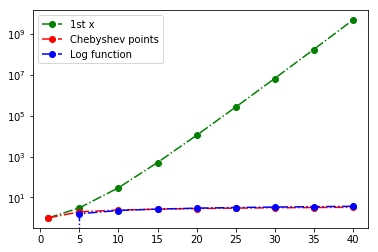

In [14]:
# set Lebesgue constant based on definition with Lebesgue function
constant = lambda x, data: numpy.max(lebesguefunction(x, data))
Nrange = numpy.array([1.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0])
x = numpy.linspace(0, 1, 1000)
lc1 = numpy.zeros(Nrange.shape[0])
lc2 = numpy.zeros(Nrange.shape[0])
for (i, N) in enumerate(Nrange):
    data = -1.0 + 2.0 * numpy.arange(N+1) / N
    lc1[i] = constant(x, data)
    data = numpy.cos((2.0 * numpy.arange(1, N+1) - 1.0) / (2.0 * N) * numpy.pi)
    lc2[i] = constant(x, data) 

#plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(Nrange, lc1, 'go-.', label = "1st x")
axes.semilogy(Nrange, lc2, 'ro-.', label = "Chebyshev points")
axes.semilogy(Nrange, numpy.log(Nrange), 'bo-.', label = "Log function")
axes.legend()

plt.show()

Solution: From the above graph we see that in the first choice of the distribution of points, the Lebesgue constant drastically increases faster than both the Lebesgue constant of Chebyshev points and log function.

Clearly, we see that for sure they grow with or over the predicted grow rate log(N).